In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers

from keras import backend as K 

import matplotlib.pyplot as plt

K.clear_session()

In [11]:
from keras import backend as K
K.clear_session()

### Setting Up GPU as a training device

In [12]:
physical_devices = tf.config.list_physical_devices()

print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
tf.config.set_visible_devices(physical_devices[1], 'GPU')

### Loading Data

In [14]:
N_TRAIN_EXAMPLES = 50000
N_VALIDATION_EXAMPLES = 0
N_TEST_EXAMPLES = 10000

CLASSES=10

In [15]:
from sklearn.model_selection import train_test_split

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

# Concatenate train and test images
X = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N_TRAIN_EXAMPLES+N_VALIDATION_EXAMPLES, test_size=N_TEST_EXAMPLES, random_state=1)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=N_TRAIN_EXAMPLES, test_size=N_VALIDATION_EXAMPLES, random_state=1)

# Getting dummy variables
y_train_fixed = np.zeros((y_train.shape[0], 10))
# y_valid_fixed = np.zeros((y_valid.shape[0], 10))
y_test_fixed = np.zeros((y_test.shape[0], 10))

i = 0
for [val] in y_train:
  y_train_fixed[i][val] = 1
  i += 1
  
# i = 0
# for [val] in y_valid:
#   y_valid_fixed[i][val] = 1
#   i += 1
  
  
i = 0
for [val] in y_test:
  y_test_fixed[i][val] = 1
  i += 1

### Setting up the model

AlexNet implementation in keras:

```py
  keras.Input(shape=(227, 227, 3)),
  layers.Conv2D(96, kernel_size=11, strides=4, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(256, kernel_size=5, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(256, kernel_size=3, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dense(CLASSES, activation="softmax")
```

In [16]:
conv_regularizer = regularizers.l2(l=0.01)
dense_regularizer = regularizers.l2(l=0.01)

model = keras.Sequential(
  [
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(80, kernel_size=3, strides=1, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=2, strides=1),
    layers.Conv2D(112, kernel_size=5, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Conv2D(160, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.Conv2D(160, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.Conv2D(112, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(768, activation="relu", kernel_regularizer=dense_regularizer),
    layers.Dropout(0.4),
    layers.Dense(768, activation="relu", kernel_regularizer=dense_regularizer),
    layers.Dense(CLASSES, activation="softmax"),
    
  ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 112)       224112    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 112)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 160)       161440    
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 160)       2

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training model

In [26]:
CHECKPOINT_PATH = 'models/checkpoints/cifar10_test_model_L_v1_best.keras'

In [18]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
  filepath=CHECKPOINT_PATH,
  save_weights_only=False,
  monitor='val_accuracy',
  mode='max',
  save_best_only=True)

In [19]:
%%time
batch_size = 400
epochs = 250
validation_split = 0.2
history = model.fit(X_train, y_train_fixed, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True, callbacks=[model_checkpoint_callback])

Epoch 1/250
100/100 [==============================] - 27s 152ms/step - loss: 21.6568 - accuracy: 0.1909 - val_loss: 15.3506 - val_accuracy: 0.3365
Epoch 2/250
100/100 [==============================] - 15s 149ms/step - loss: 12.6515 - accuracy: 0.3868 - val_loss: 10.3467 - val_accuracy: 0.4512
Epoch 3/250
100/100 [==============================] - 15s 151ms/step - loss: 8.9632 - accuracy: 0.4417 - val_loss: 7.5756 - val_accuracy: 0.5033
Epoch 4/250
100/100 [==============================] - 15s 149ms/step - loss: 6.7731 - accuracy: 0.4718 - val_loss: 5.8588 - val_accuracy: 0.5194
Epoch 5/250
100/100 [==============================] - 15s 149ms/step - loss: 5.3108 - accuracy: 0.5156 - val_loss: 4.7624 - val_accuracy: 0.5232
Epoch 6/250
100/100 [==============================] - 15s 149ms/step - loss: 4.3081 - accuracy: 0.5507 - val_loss: 3.8460 - val_accuracy: 0.5902
Epoch 7/250
100/100 [==============================] - 15s 149ms/step - loss: 3.6297 - accuracy: 0.5702 - val_loss: 3.22

In [28]:
# Evaluate the best checkpoint

best_checkpoint = keras.models.load_model(CHECKPOINT_PATH)

loss, score = best_checkpoint.evaluate(X_test, y_test_fixed)

print(loss, score)

313/313 [==============================] - 2s 6ms/step - loss: 0.9706 - accuracy: 0.8060
0.9705803990364075 0.8059999942779541


Text(0.5, 1.0, 'Loss Curves')

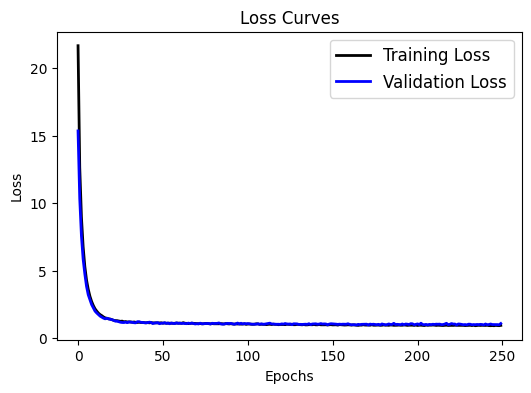

In [21]:
# Plotting the loss curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

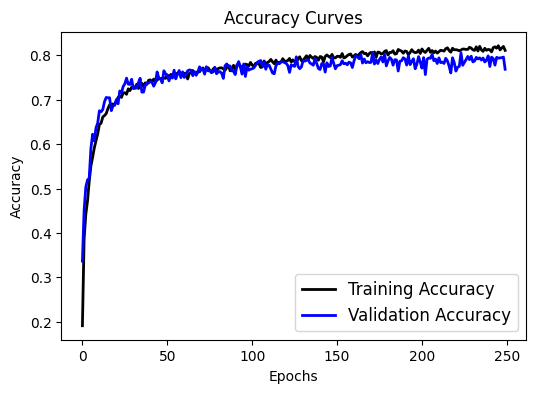

In [22]:
# Plotting the accuracy curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Saving model to file

In [23]:
# model.save("models/cifar10_test_model_L_v1.0.2.keras")

In [25]:
import json

with open('models/checkpoints/cifar10_test_model_L_v1_best_history.json', 'w') as f:
  json.dump(history.history, f)